In [3]:
import networkx as nx
from networkx.algorithms.community import label_propagation_communities
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt

In [4]:
# Leo una red en formato pajek
G = nx.read_pajek("net_17.net")
# Se supone que todos los archivos los dejé no-dirigidos, pero por si acaso...
G = G.to_undirected()
G

# Basic Data

In [5]:
# Get the number of nodes
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 924
Number of edges: 3239


In [6]:
# First edge
u, v, data = G.edges(data=True).__iter__().__next__()
print("First edge:", u, v, data)

First edge: 1 2 {'weight': 1.958915898}


# Conexity

In [7]:
connected_components = list(nx.connected_components(G))

# Print the number of connected components and their sizes
print("Number of connected components:", len(connected_components))
for i, component in enumerate(connected_components, start=1):
    print("Component", i, "size:", len(component))

Number of connected components: 13
Component 1 size: 878
Component 2 size: 3
Component 3 size: 3
Component 4 size: 3
Component 5 size: 6
Component 6 size: 3
Component 7 size: 9
Component 8 size: 3
Component 9 size: 3
Component 10 size: 4
Component 11 size: 3
Component 12 size: 3
Component 13 size: 3


In [8]:
# Giant Component
S = G.subgraph(max(nx.connected_components(G), key=len)).copy()

Ssimp = nx.Graph()
for u,v,data in S.edges(data=True):
    if not Ssimp.has_edge(u,v):
        Ssimp.add_edge(u, v)
    

Ssimp.number_of_nodes(), Ssimp.number_of_edges()

(878, 3181)

In [9]:
giant_component_node_ratio = Ssimp.number_of_nodes() / num_nodes

print(f"Giant component node ratio: {giant_component_node_ratio:.2f}")
print(f"Smaller component node ratio: {(1 - giant_component_node_ratio):.2f}")

Giant component node ratio: 0.95
Smaller component node ratio: 0.05


# Degrees

In [10]:
degrees = [degree for node, degree in Ssimp.degree()]

# Get the minimum, maximum, and average degree
min_degree = min(degrees)
max_degree = max(degrees)
avg_degree = sum(degrees) / len(degrees)

print("Minimum degree:", min_degree)
print("Maximum degree:", max_degree)
print("Average degree:", avg_degree)

Minimum degree: 1
Maximum degree: 151
Average degree: 7.246013667425968


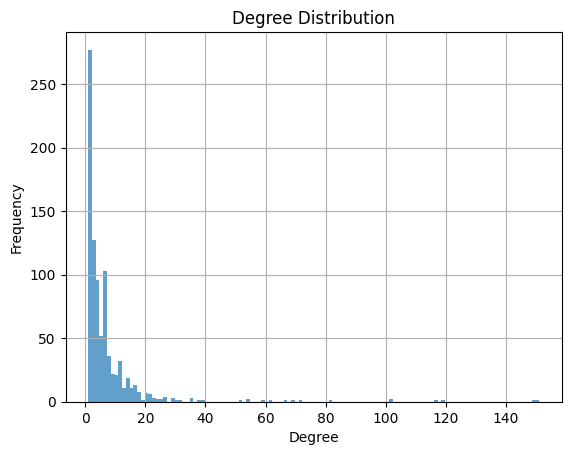

In [11]:
# Plot the degree distribution
plt.hist(degrees, bins='auto', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Distances

In [12]:
average_shortest_path_length = nx.average_shortest_path_length(Ssimp)
diameter = nx.diameter(Ssimp)

print("Average distance between nodes:", average_shortest_path_length)
print("Diameter of the graph:", diameter)

Average distance between nodes: 3.7349033643893685
Diameter of the graph: 10


# Transitivity

In [13]:
# Calculate the average clustering coefficient
average_clustering_coefficient_t = nx.average_clustering(Ssimp, count_zeros=True)
average_clustering_coefficient_f = nx.average_clustering(Ssimp, count_zeros=False)

print("Average clustering coefficient count_zeros=True:", average_clustering_coefficient_t)
print("Average clustering coefficient count_zeros=False:", average_clustering_coefficient_f)


Average clustering coefficient count_zeros=True: 0.5889265274190247
Average clustering coefficient count_zeros=False: 0.6455399389187313


TODO: Make random graph and calculate the average clustering to compare the results

# Centralidad TODO: Daniel

# Core

In [14]:
def get_kcore_depth(net, verbose=False):
	i = 1
	while True:
		n_nodes = len(nx.k_core(net, i))
		if verbose: print(f"Number of nodes in the {i}-core:", n_nodes)
		if n_nodes == 0:
			break
		i += 1
	if verbose: print("Maximum core number:", i - 1)
	return i - 1

get_kcore_depth(Ssimp, verbose=True)

Number of nodes in the 1-core: 878
Number of nodes in the 2-core: 806
Number of nodes in the 3-core: 572
Number of nodes in the 4-core: 421
Number of nodes in the 5-core: 315
Number of nodes in the 6-core: 223
Number of nodes in the 7-core: 136
Number of nodes in the 8-core: 79
Number of nodes in the 9-core: 56
Number of nodes in the 10-core: 0
Maximum core number: 9


9

# Communities TODO: Daniel

In [15]:
nx_comm.modularity(Ssimp, list(label_propagation_communities(Ssimp)))

0.5236017038054361

# Asortatividad

In [16]:
pearson_coefficient = nx.degree_pearson_correlation_coefﬁcient(Ssimp)
assortativity = nx.degree_assortativity_coefficient(Ssimp)

print("Pearson coefficient:", pearson_coefficient)
print("Assortativity coefficient:", assortativity)

Pearson coefficient: -0.18865407708232612
Assortativity coefficient: -0.18865407708232587


# Structural Model

In [25]:
n_graphs = 10

data = {"lovaina": [], "pearson_coefficient": [], "average_clustering_coefficient": [], "kcore_depth": []}

for i in range(n_graphs):
	#graphs[i] = {}
	config_model = nx.configuration_model([d for v, d in Ssimp.degree()])
	# Convert the configuration model graph into a simple graph
	random_graph = nx.Graph(config_model)

	# You might want to remove self-loops and parallel edges
	random_graph = nx.Graph(random_graph)

	random_graph.remove_edges_from(nx.selfloop_edges(random_graph))

	#graphs[i]["graph"] = random_graph
	#graphs[i]["data"] = {}

	#data = graphs[i]["data"]

	# Lovaina
	lovaina = nx_comm.modularity(random_graph, list(label_propagation_communities(random_graph)))
	data["lovaina"].append(lovaina)
	#print("Lovaina:", lovaina)
	# Correlation
	pearson_coefficient = nx.degree_pearson_correlation_coefﬁcient(random_graph)
	data["pearson_coefficient"].append(pearson_coefficient)
	# Average Local clustering coefficient
	average_clustering_coefficient = nx.average_clustering(random_graph, count_zeros=False)
	data["average_clustering_coefficient"].append(average_clustering_coefficient)
	# Depth of the k-core
	kcore_depth = get_kcore_depth(random_graph)
	data["kcore_depth"].append(kcore_depth)
data

{'lovaina': [0.021553982121432346,
  0.022757115915968646,
  0.023450585432138137,
  0.010500120549071453,
  0.01448917227524187,
  0.011552888888888887,
  0.010445056026743497,
  0.019232002931170424,
  0.011131261525852094,
  0.023518429544922406],
 'pearson_coefficient': [-0.06659239240878882,
  -0.07859132401747695,
  -0.0901070790272283,
  -0.09045748091143256,
  -0.08225278950726839,
  -0.07068883501850518,
  -0.09901844811632098,
  -0.08348609800648268,
  -0.08767577754900113,
  -0.0938217037462714],
 'average_clustering_coefficient': [0.18593649792769038,
  0.18138960023944198,
  0.17989394826800725,
  0.1793275446104134,
  0.17965747013278388,
  0.15346761011498644,
  0.16135015368337688,
  0.18115181315306647,
  0.17905969753677284,
  0.18843814218589813],
 'kcore_depth': [7, 8, 8, 7, 7, 8, 7, 7, 7, 7]}

In [26]:
import pandas as pd 

df = pd.DataFrame(data)
df

,lovaina,pearson_coefficient,average_clustering_coefficient,kcore_depth
0,0.021554,-0.066592,0.185936,7
1,0.022757,-0.078591,0.181390,8
2,0.023451,-0.090107,0.179894,8
3,0.010500,-0.090457,0.179328,7
4,0.014489,-0.082253,0.179657,7
5,0.011553,-0.070689,0.153468,8
6,0.010445,-0.099018,0.161350,7
7,0.019232,-0.083486,0.181152,7
8,0.011131,-0.087676,0.179060,7
9,0.023518,-0.093822,0.188438,7


In [27]:
import pickle as pkl

with open('random_nets_dict.pickle', 'wb') as fp:
    pkl.dump(data, fp, protocol=pkl.HIGHEST_PROTOCOL)